# 1) Librerías necesarías

- `os`: para manipulación de rutas del sistema.
- `pandas`: para análisis y manipulación de datos.
- `zipfile`: para descomprimir archivos `.zip` descargados desde Kaggle.
- `KaggleApi`: para autenticar y descargar archivos directamente desde la competencia en Kaggle

Esta celda siempre se debe correr indpendiente si ya tienes el archivo descargado o deseas descargarlo desde kaggle directamente

In [2]:
import os 
import pandas as pd
import zipfile
from kaggle.api.kaggle_api_extended import KaggleApi

# **NOTA:** Ruta necesaria en tu entorno:
* Si tienes decargado el archivo kaggle.JSON con tu usuaruo y contraseña ejecuta las celdas desde la 2) hasta la 7).
* Si tienes en tu PC la ruta exacta del archivo 'train.csv' descomenta y ejecuta a partir de 8), ignorando lo que hay de 2) hasta 7).
* A partir de 9) todo es necesario de ejecutar

## **Puedes decargar el archivo .JSON asi:**
 - Primer paso:
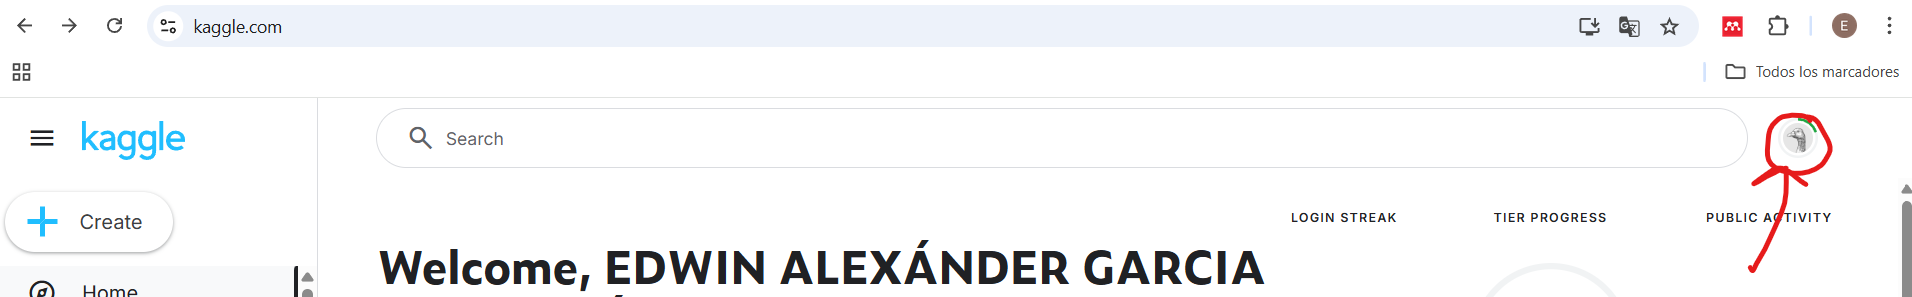

- Segundo paso:
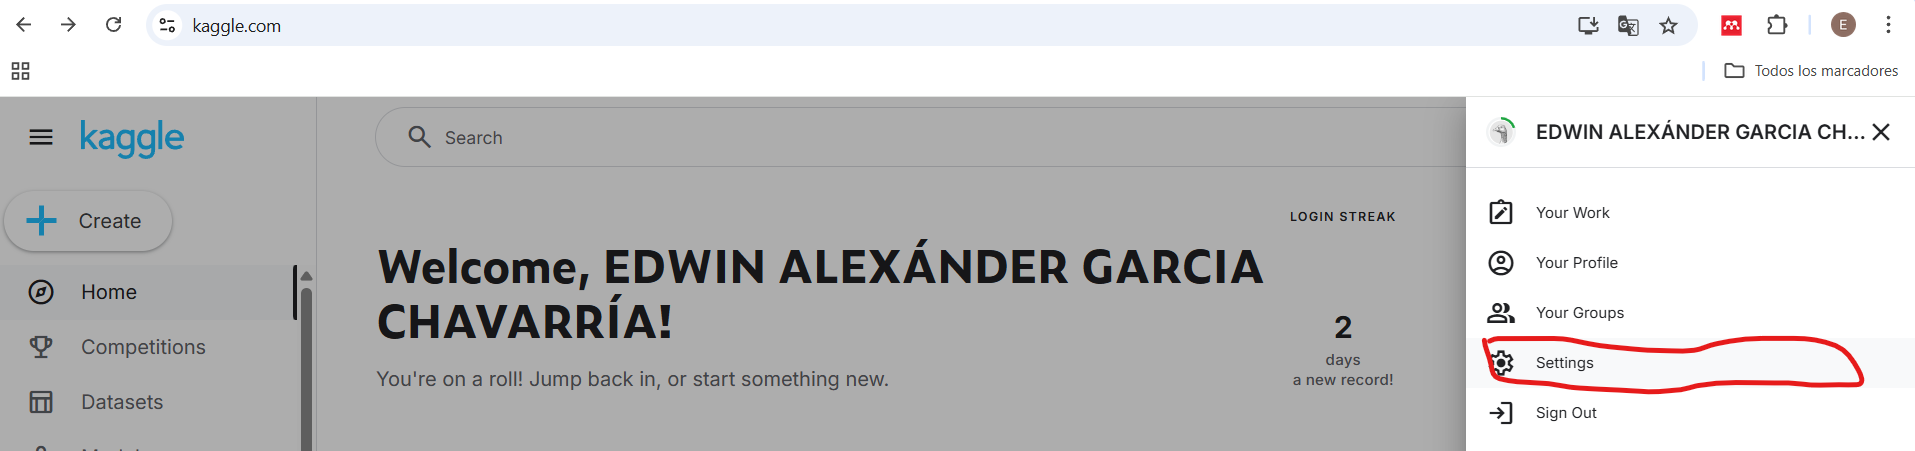

- Tercer paso:

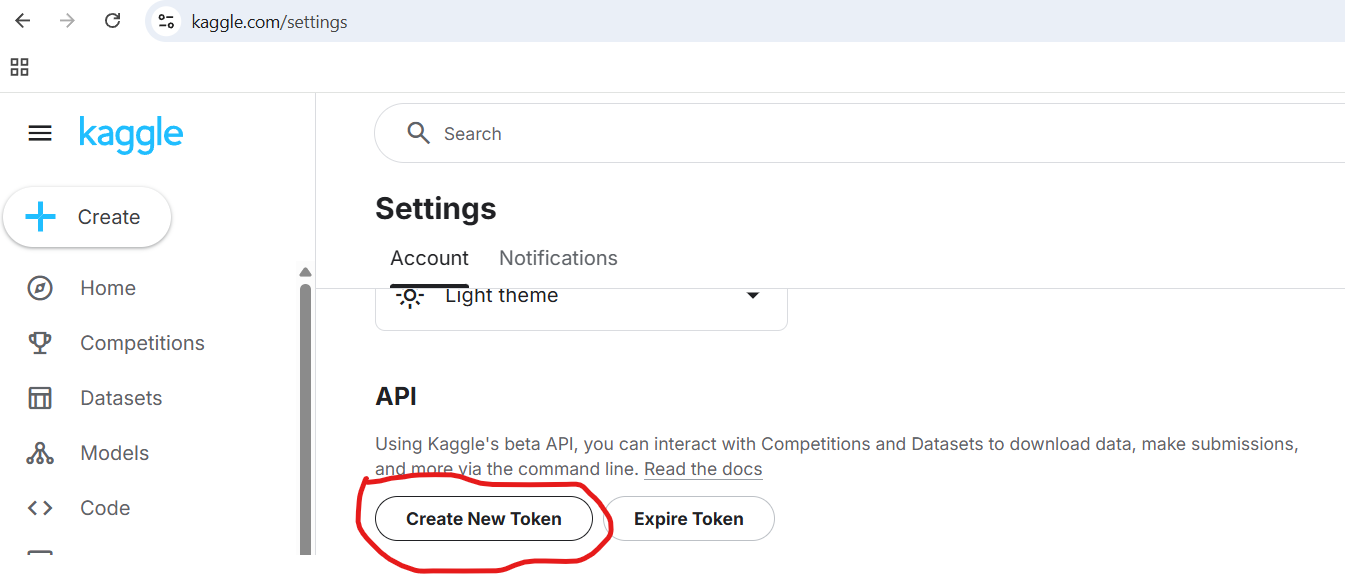

- Cuarto paso: 

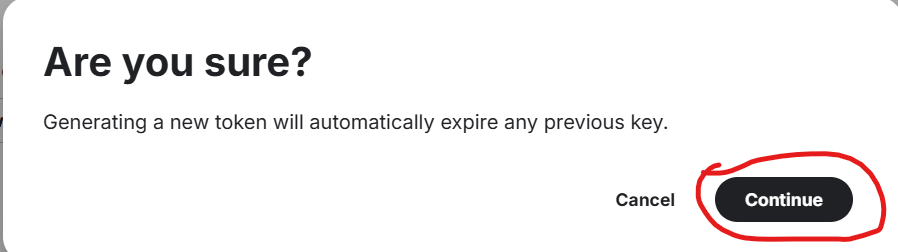

- Quinto paso:

Crea una carpeta llamada .kaggle en 'C:\Users\nombre usuario' y pega el archivo decargado en esa carpeta. 


# 2) Ruta archivo .JSON

Búsqueda del archivo descargado

In [7]:
os.environ['KAGGLE_CONFIG_DIR']=os.path.expanduser('~/.kaggle')

# 3) Autenticación

Nos autenticamos desde python a kaggle usando las credenciales del archivo descargado

In [8]:
api = KaggleApi()
api.authenticate()

# 4) Descarga de archivos

Llamámos el nombre de la carpeta que contiene los archivos en kaggle, nombramos la carpta donde queremos que se guarde esta descarga (en mi casi la estoy llmando 'Archivos_Proyecto') y forzamos la descraga en caso de que ya exista. 

In [9]:
api.competition_download_files(
    'udea-ai-4-eng-20251-pruebas-saber-pro-colombia',
    path = 'Archivos_Proyecto/',
    force = True
)

100%|██████████| 29.9M/29.9M [00:00<00:00, 165MB/s] 

# 5) Carpeta donde están los archivos

Esto para utilizarlo con facilidad en las siguientes celdas. Poner el mismo nombre que se puso en path en la celda anterior

In [10]:
carpeta = 'Archivos_proyecto/'

# 6) Extracción de archivos

Extraemos la carpeta descargada como .zip en la misma carpeta que ya tenemos creada. 

In [11]:
with zipfile.ZipFile(carpeta + 'udea-ai-4-eng-20251-pruebas-saber-pro-colombia.zip','r') as zip_ref:
    zip_ref.extractall(carpeta)

# 7) Lectura archivo

Leemos el archivo 'train.csv' de la carpeta

In [12]:
df_train = pd.read_csv(carpeta + 'train.csv')

# Nota: Esta es la celda que corremos en caso de no querer descargar el archivo .JSON con las credenciales y tener el archivo 'train.csv' ya descargado. 

Recuerda poner la ruta donde tienes tu archivo 'train.csv'

# 8) Ruta archivo descargdo y lectura del mismo

Descomenta si no trabajaste con kaggle.json y tienes el archivo 'train.csv' ya en tu ordenador

In [13]:
# archivo = "C:\Users\edwin\OneDrive\Documentos\IA\Proyecto_IA_20251\Archivos_Proyecto\train.csv"
# df_train = pd.read_csv(archivo)

# 9) Visualización del archivo 

Se visualizan las primeras filas del archivo

In [14]:
df_train.head()

,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_TIENELAVADORA,...,ESTU_PRIVADO_LIBERTAD,ESTU_PAGOMATRICULAPROPIO,FAMI_TIENECOMPUTADOR,FAMI_TIENEINTERNET.1,FAMI_EDUCACIONMADRE,RENDIMIENTO_GLOBAL,coef_1,coef_2,coef_3,coef_4
0,904256,20212,ENFERMERIA,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica incompleta,Si,...,N,No,Si,Si,Postgrado,medio-alto,0.322,0.208,0.310,0.267
1,645256,20212,DERECHO,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,No,Técnica o tecnológica completa,Si,...,N,No,Si,No,Técnica o tecnológica incompleta,bajo,0.311,0.215,0.292,0.264
2,308367,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Si,...,N,No,No,Si,Secundaria (Bachillerato) completa,bajo,0.297,0.214,0.305,0.264
3,470353,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,Entre 4 millones y menos de 5.5 millones,0,Estrato 4,Si,No sabe,Si,...,N,No,Si,Si,Secundaria (Bachillerato) completa,alto,0.485,0.172,0.252,0.190
4,989032,20212,PSICOLOGIA,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,Si,Primaria completa,Si,...,N,No,Si,Si,Primaria completa,medio-bajo,0.316,0.232,0.285,0.294


# 10) Información del archivo

Nos dice el nombre de las columnas y qué tipo de datos contiene

In [15]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 692500 entries, 0 to 692499
Data columns (total 21 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   ID                              692500 non-null  int64  
 1   PERIODO                         692500 non-null  int64  
 2   ESTU_PRGM_ACADEMICO             692500 non-null  object 
 3   ESTU_PRGM_DEPARTAMENTO          692500 non-null  object 
 4   ESTU_VALORMATRICULAUNIVERSIDAD  686213 non-null  object 
 5   ESTU_HORASSEMANATRABAJA         661643 non-null  object 
 6   FAMI_ESTRATOVIVIENDA            660363 non-null  object 
 7   FAMI_TIENEINTERNET              665871 non-null  object 
 8   FAMI_EDUCACIONPADRE             669322 non-null  object 
 9   FAMI_TIENELAVADORA              652727 non-null  object 
 10  FAMI_TIENEAUTOMOVIL             648877 non-null  object 
 11  ESTU_PRIVADO_LIBERTAD           692500 non-null  object 
 12  ESTU_PAGOMATRICU

# 11) Análisis por columna

A continuación se analiza la distribución de estudiantes por departamento, estrato y desempeño.

In [16]:
print('Por depasrtamento')
print(df_train['ESTU_PRGM_DEPARTAMENTO'].value_counts().head())
print()

print('Por estrato')
print(df_train['FAMI_ESTRATOVIVIENDA'].value_counts().head())
print()

print('Por desempeño')
print(df_train['RENDIMIENTO_GLOBAL'].value_counts().head())
print()

Por depasrtamento
BOGOTÁ       282159
ANTIOQUIA     83607
VALLE         44588
ATLANTICO     41020
SANTANDER     28828
Name: ESTU_PRGM_DEPARTAMENTO, dtype: int64

Por estrato
Estrato 2    232671
Estrato 3    210685
Estrato 1    111991
Estrato 4     65514
Estrato 5     23608
Name: FAMI_ESTRATOVIVIENDA, dtype: int64

Por desempeño
alto          175619
bajo          172987
medio-bajo    172275
medio-alto    171619
Name: RENDIMIENTO_GLOBAL, dtype: int64



# 12) Relacionar  columnas

Estudiantes por combinación de departamento y estrato

In [17]:
cruce = df_train.groupby(['ESTU_PRGM_DEPARTAMENTO', 'FAMI_ESTRATOVIVIENDA']).size().unstack(fill_value='0')
cruce.head()


FAMI_ESTRATOVIVIENDA,Estrato 1,Estrato 2,Estrato 3,Estrato 4,Estrato 5,Estrato 6,Sin Estrato
ESTU_PRGM_DEPARTAMENTO,,,,,,,
AMAZONAS,17,19,3,0,0,0,1
ANTIOQUIA,7076,23016,31028,9852,5387,2758,439
ARAUCA,307,214,38,6,0,0,2
ATLANTICO,10121,12995,9296,3930,1389,1062,180
BOGOTÁ,26276,99382,101921,27992,8263,5208,994


# 13) Agrupación por departamento, estrato según desempeño

In [18]:
agrup = df_train.groupby(['ESTU_PRGM_DEPARTAMENTO', 'FAMI_ESTRATOVIVIENDA'])['RENDIMIENTO_GLOBAL'].value_counts().unstack().fillna(0)
agrup.head()

RENDIMIENTO_GLOBAL                             alto    bajo  medio-alto  \
ESTU_PRGM_DEPARTAMENTO FAMI_ESTRATOVIVIENDA                               
AMAZONAS               Estrato 1                0.0     8.0         2.0   
                       Estrato 2                1.0     7.0         4.0   
                       Estrato 3                0.0     1.0         0.0   
                       Sin Estrato              0.0     1.0         0.0   
ANTIOQUIA              Estrato 1             1219.0  2435.0      1550.0   

RENDIMIENTO_GLOBAL                           medio-bajo  
ESTU_PRGM_DEPARTAMENTO FAMI_ESTRATOVIVIENDA              
AMAZONAS               Estrato 1                    7.0  
                       Estrato 2                    7.0  
                       Estrato 3                    2.0  
                       Sin Estrato                  0.0  
ANTIOQUIA              Estrato 1                 1872.0

# 14) Filtro por departamentos específicos

In [19]:
df_train[df_train['ESTU_PRGM_DEPARTAMENTO'].isin(['ANTIOQUIA', 'BOGOTÁ'])][['ESTU_PRGM_DEPARTAMENTO', 'PERIODO']].head()

,ESTU_PRGM_DEPARTAMENTO,PERIODO
0,BOGOTÁ,20212
2,BOGOTÁ,20203
4,ANTIOQUIA,20212
5,ANTIOQUIA,20203
7,BOGOTÁ,20183
